In [2]:
import numpy as np
import hist
from coffea.analysis_tools import Weights
from coffea import processor
import awkward as ak
from coffea.nanoevents import  NanoEventsFactory, NanoAODSchema
from coffea.lookup_tools import extractor
from coffea.analysis_tools import PackedSelection
import warnings
warnings.filterwarnings("ignore")
import correctionlib


In [3]:
#fname = "/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-200/LQLQToTopMu_M-200_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-200/240226_054928/0000/tree_1.root"
#fname = "/eos/user/b/bsirasva/LQToTopmu_Mc/LQToTopMu_M_800"
#fname = "/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/tw_top/ST_tW_top_5f_NoFullyHadronicDecays_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_tw_top/240209_133942/0000/tree_1.root"
#fname = "/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/DYJetsToLL/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_14_Mar24_MCUL2017_DYJetsToLL/240314_052334/0000/tree_1.root"
#fname = "/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WJetsToLNu_1J/WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_14_Mar24_MCUL2017_WJetsToLNu_1J/240314_052105/0000/tree_1.root"
    
fname = "/persistent/data1/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/ttbar_FullyLeptonic/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_ttbar_FullyLeptonic/240209_134459/0000/tree_1.root"
#fname = "/persistent/data1/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/ttbar_SemiLeptonic/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_ttbar_SemiLeptonic/240209_135137/0000/tree_1.root"
#fname = "/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WJetsToLNu_0J/WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_14_Mar24_MCUL2017_WJetsToLNu_0J/240314_052449/0000/tree_1.root"
#fname = "/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WJetsToLNu_2J/WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_14_Mar24_MCUL2017_WJetsToLNu_2J/240314_052219/0000/tree_1.root"
#fname = "/persistent/data1/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/ttbar_FullyLeptonic/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_ttbar_FullyLeptonic/240209_134459/0000/tree_1.root"
#fname = "/eos/user/b/bsirasva/RUN2_UL/Tree_crab/SEVENTEEN/MC/Schannel/ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8/Tree_09_Feb24_MCUL2017_Schannel/240209_133837/0000/tree_1.root"
#fname = "/eos/user/b/bsirasva/RUN2_UL/Tree_crab/SEVENTEEN/MC/Tchannel/ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8/Tree_09_Feb24_MCUL2017_Tchannel/240209_134248/0000/tree_1.root"
#fname = "/eos/user/b/bsirasva/RUN2_UL/Tree_crab/SEVENTEEN/MC/Tbarchannel/ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8/Tree_09_Feb24_MCUL2017_Tbarchannel/240209_134147/0000/tree_13.root"
#fname = "/eos/user/b/bsirasva/RUN2_UL/Tree_crab/SEVENTEEN/MC/tw_antitop/ST_tW_antitop_5f_NoFullyHadronicDecays_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_tw_antitop/240209_134826/0000/tree_1.root"
#fname = "/eos/user/b/bsirasva/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTZToLLNuNu/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8/Tree_09_Feb24_MCUL2017_TTZToLLNuNu/240209_135738/0000/tree_1.root"
#fname = "/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTZToLL/TTZToLL_M-1to10_TuneCP5_13TeV-amcatnlo-pythia8/Tree_09_Feb24_MCUL2017_TTZToLL/240209_134712/0000/tree_1.root"
#fname = "/eos/user/b/bsirasva/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTZToNuNu/TTZT
#fname = "/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTToHadronic/TTToHadronic_TuneCP5_13TeV-powheg-pythia8/Tree_12_Mar24_MCUL2017_TTToHadronic/240312_053322/0000/tree_1.root"

In [4]:
#fname = "4691C116-43D3-BE40-82DE-AEBA114E2D52.root"
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema.v6,
    metadata={"dataset": "dataset"},
).events()

In [5]:
print(events.fields)

['Generator', 'Tau', 'GenJetAK8', 'Flag', 'Jet', 'PuppiMET', '100', 'GenPart', 'puWeightDown', 'RawMET', 'PV', 'puWeightUp', 'event', 'Muon', 'puWeight', 'FatJet', 'PSWeight', 'Pileup', 'TrigObj', 'run', 'GenVisTau', 'fixedGridRhoFastjetAll', 'HLT', '102', '103', 'luminosityBlock', 'GenDressedLepton', 'GenJet', 'Electron', 'MET', 'SV', 'LHEPdfWeight', 'LHEScaleWeight', '101', 'CorrT1METJet', 'L1PreFiringWeight', 'LHEWeight']


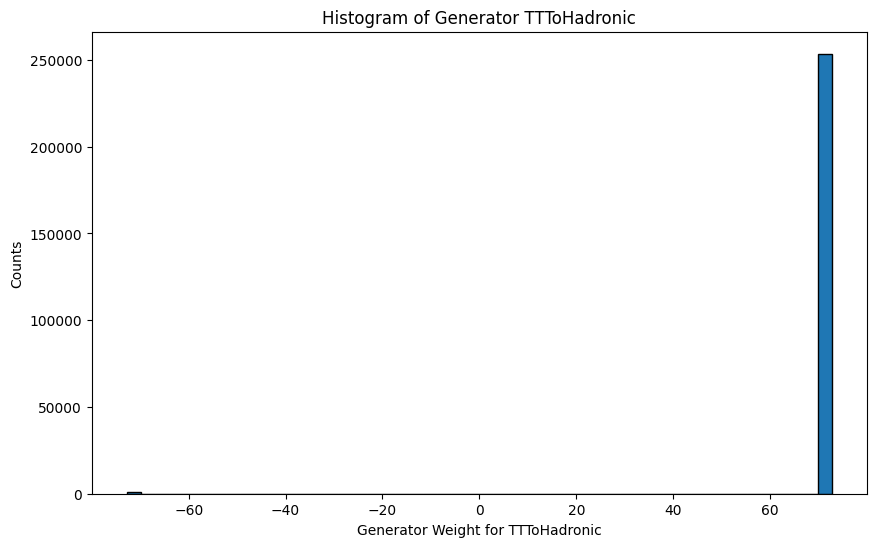

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'events' is your dataset and it has an attribute or key 'Generator'
# that contains 'weights', adjust if your data structure differs.
generator_weights = events.Generator.weight

# Create a histogram of the generator weights
# `bins` can be adjusted to your preference for granularity
weights, edges = np.histogram(generator_weights, bins=50)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(edges[:-1], weights, width=np.diff(edges), edgecolor="black", align="edge")
plt.xlabel('Generator Weight for TTToHadronic')
plt.ylabel('Counts')
plt.title('Histogram of Generator TTToHadronic')
plt.savefig(f'plot/weights_for_Gen_TTToHadronic.png', bbox_inches='tight', dpi=300)
plt.show()

In [7]:
print(events.Muon.pfRelIso04_all)

[[0.000714, 0.61], [0.0338], [3.11, 2.68, ... 8.4, 9.49], [0.00409, 0.407], []]


In [8]:
class NanoProcessor(processor.ProcessorABC):
    def __init__(self):
        self.nLep = 2 # greater than equal to
        self.nJet = 2 # greater than equal to
        self.nbJet = 1 # greater than equal to
        # Lepton pT thresholds
        self.lep_pt_min = 30.0
        self.lep_pt_max = 3000.0
        self.lep_ptHist_nBins = 100
        self.lep_ptHist_min = 0
        self.lep_ptHist_max = 100
        
        # Lepton eta thresholds
        self.lep_abseta_max = 2.4 # HLT SF limit
        self.lep_etaHist_nBins = 60
        self.lep_etaHist_min = -3.0
        self.lep_etaHist_max = 3.0
        
        # AK4 jets pt kinematics
        
        self.jet_pt_min = 30.0
        #self.jet_pt_max = 3000.0
        self.jet_ptHist_nBins = 60
        self.jet_ptHist_min = 0.0
        self.jet_ptHist_max = 100.0
        
        # AK4 jets eta kinematics
        self.jet_abseta_max = 2.4  # HLT SF limit
        self.jet_etaHist_nBins = 60
        self.jet_etaHist_min = -2.5
        self.jet_etaHist_max = 2.5 
        
        #muon number
        self.lep_number_min = 0
        self.lep_number_max = 100
        self.lep_numberhist_nBins = 10
        self.lep_numberHist_min = 0
        self.lep_numberHist_max = 10
        
        # Jet number
        self.jet_number_min = 0
        self.jet_number_max = 50
        self.jet_numberhist_nBins = 10
        self.jet_numberHist_min = 0
        self.jet_numberHist_max = 10
        
        #MET 
        self.MET_min = 0
        self.MET_max = 2000
        self.MET_Hist_nBins = 100
        self.MET_Hist_min = 0
        self.MET_Hist_max = 2000
        
        #Dimuon
        self.MET_min = 0
        self.MET_max = 2000
        self.Dimuonhist_nBins = 100
        self.Dimuonhist_min = 0
        self.Dimuonhist_max = 2000
        
        #MET
        self.ST_threshold = 750
        
        # Tight ID configs
        self.muTightID_file = 'SF/SEVENTEEN/Mu/ID/muon_Z.json'

        #HLT configs
        self.muHLT_file = 'SF/SEVENTEEN/Mu/Trigger/Efficiencies_muon_generalTracks_Z_Run2017_UL_SingleMuonTriggers_schemaV2_edited.json'
        
        # B-Tagging configs
        #self.btagThreshold = 0.2598
        self.btagThreshold = 0.3040
        self.btagSF_file = 'SF/SEVENTEEN/Mu/btagging/btagging.json'
        
        self.ISOSF_file = 'SF/SEVENTEEN/Mu/ISO/Efficiencies_muon_generalTracks_Z_Run2017_UL_ISO.json'

        
        pass
        # Define histograms with hist class- https://hist.readthedocs.io/
        
       
    @property
    ## accumulating processed results
    def accumulator(self):
        return self._accumulator

   
    def process(self, events):
      try: 
        ## create the dictionary contains 
        #print(f"Working with {events.metadata['dataset']}")
        output = {
            "sumw" : processor.defaultdict_accumulator(float),
            "NoSel":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                },            
            "HLT":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                },
            "2Lep":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                },
            "GoodLep":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                "muon_pt":  hist.Hist(
                        hist.axis.Regular(self.lep_ptHist_nBins, self.lep_ptHist_min, self.lep_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                },
            
            "Veto":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                 "muon_pt":  hist.Hist(
                        hist.axis.Regular(self.lep_ptHist_nBins, self.lep_ptHist_min, self.lep_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                },
            "Oppchg":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                 "muon_pt":  hist.Hist(
                        hist.axis.Regular(self.lep_ptHist_nBins, self.lep_ptHist_min, self.lep_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                },
            "Good2J":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                 "muon_pt":  hist.Hist(
                        hist.axis.Regular(self.lep_ptHist_nBins, self.lep_ptHist_min, self.lep_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                },
            "btagJ":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                 "muon_pt":  hist.Hist(
                        hist.axis.Regular(self.lep_ptHist_nBins, self.lep_ptHist_min, self.lep_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                "jet_pt":  hist.Hist(
                        hist.axis.Regular(self.jet_ptHist_nBins, self.jet_ptHist_min, self.jet_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                },
            "St":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                 "muon_pt":  hist.Hist(
                        hist.axis.Regular(self.lep_ptHist_nBins, self.lep_ptHist_min, self.lep_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                "jet_pt":  hist.Hist(
                        hist.axis.Regular(self.jet_ptHist_nBins, self.jet_ptHist_min, self.jet_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                },
            "Mll":{
                "selEvents" : processor.defaultdict_accumulator(float),
                "wtEvents" : processor.defaultdict_accumulator(float),
                "muon_pt":  hist.Hist(
                        hist.axis.Regular(self.lep_ptHist_nBins, self.lep_ptHist_min, self.lep_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                "jet_pt":  hist.Hist(
                        hist.axis.Regular(self.jet_ptHist_nBins, self.jet_ptHist_min, self.jet_ptHist_max, name="pt", label="$p_T$ [GeV]"),
                        hist.storage.Weight(),
                        ),
                "nMuon": hist.Hist(
                        hist.axis.Regular(self.lep_numberhist_nBins, self.lep_numberHist_min, self.lep_numberHist_max, name="nMuon", label="$ \mu number $"),
                        hist.storage.Weight(),
                        ),
            },

        }
        isRealData = not hasattr(events, "Generator")
        dataset = events.metadata["dataset"]
        if isRealData:
            output["sumw"] = len(events)
            #print("dfd")
        else:
            output["sumw"] = ak.sum(events.Generator.weight)
        ################
        #Inverient Mass#
        ################
        # Generate all possible muon pairs
        muon_pairs = ak.combinations(events.Muon, 2)
        # Calculate the charge product to filter pairs with opposite charges
        charge_product = muon_pairs['0'].charge * muon_pairs['1'].charge
        opposite_charge_pairs = muon_pairs[charge_product < 0]
        # Extract pt, eta, and phi for muons with opposite charges
        pt1 = opposite_charge_pairs['0'].pt
        pt2 = opposite_charge_pairs['1'].pt
        eta1 = opposite_charge_pairs['0'].eta
        eta2 = opposite_charge_pairs['1'].eta
        phi1 = opposite_charge_pairs['0'].phi
        phi2 = opposite_charge_pairs['1'].phi
        # Calculate the invariant mass for these muon pairs
        invariant_mass = np.sqrt(2 * pt1 * pt2 * (np.cosh(eta1 - eta2) - np.cos(phi1 - phi2)))

        ####################
        #    Selections    #
        ####################
        
        selection = PackedSelection()
        selection.add("atleasttwolep", ak.num(events.Muon) >= self.nLep)
        selection.add("TightLpt_eta", ak.sum((events.Muon.pt >= self.lep_pt_min)  & (events.Muon.pt <= self.lep_pt_max) & (abs(events.Muon.eta) <= self.lep_abseta_max) & (events.Muon.tightId) & (events.Muon.pfRelIso04_all < 0.15), axis=1) >= self.nLep)
        selection.add("muon_and_antimuon", ak.any(events.Muon.charge < 0, axis=1) & ak.any(events.Muon.charge > 0, axis=1))
        selection.add("Mll", ak.all((invariant_mass >= 110), axis=1))
        selection.add("ST", (ak.sum(events.Muon.pt, axis=1) + ak.sum(events.Jet.pt, axis=1) + events.MET.pt) >= self.ST_threshold)
        selection.add("one_veto", ~ak.any(events.Electron.cutBased ==1, axis = 1))
        selection.add("atleasttwoJ", ak.num(events.Jet) >= self.nJet)
        selection.add("JetPtandEta", ak.sum((events.Jet.pt >= self.jet_pt_min) & (abs(events.Jet.eta) <= self.jet_abseta_max), axis = 1) >= self.nJet)
        selection.add("HLT",  events.HLT.IsoMu27)
        selection.add("mediumBTagGoodJets", ak.sum((events.Jet.pt >= self.jet_pt_min) & (abs(events.Jet.eta) <= self.jet_abseta_max) & (events.Jet.btagDeepFlavB > self.btagThreshold), axis = 1) >= self.nbJet)
        selectionList = {
        "NoSel":{},
        "HLT":{"HLT": True},
        "2Lep":{"HLT": True, 'atleasttwolep': True },
        "GoodLep":{"HLT": True,'atleasttwolep': True, 'TightLpt_eta': True},
        "Veto":{"HLT": True,'atleasttwolep': True,'TightLpt_eta': True, 'one_veto':True},
        "Oppchg":{"HLT": True,'atleasttwolep': True,'TightLpt_eta': True, 'one_veto':True, 'muon_and_antimuon':True},
        "Good2J":{"HLT": True,'atleasttwolep': True, 'TightLpt_eta': True, 'one_veto':True , 'muon_and_antimuon':True, "atleasttwoJ": True, "JetPtandEta": True},
        "btagJ":{"HLT": True,'atleasttwolep': True, 'TightLpt_eta': True,'one_veto':True, 'muon_and_antimuon':True, "atleasttwoJ": True, "JetPtandEta": True, "mediumBTagGoodJets": True},
        "St":{"HLT": True,'atleasttwolep': True, 'TightLpt_eta': True, 'one_veto':True, 'muon_and_antimuon':True, "atleasttwoJ": True, "JetPtandEta": True, "mediumBTagGoodJets": True, 'ST':True},
        "Mll":{"HLT": True,'atleasttwolep': True, 'TightLpt_eta': True, 'one_veto':True, 'muon_and_antimuon':True, "atleasttwoJ": True, "JetPtandEta": True, "mediumBTagGoodJets": True, 'ST':True, 'Mll':True},
        }
        for region, cuts in selectionList.items():
            print("########################################################################################################")
            print("------------------------------------------------Selections-------------------------------------------------------")
            event_level = selection.require(**cuts)
            print(f"{region} : {cuts}")
            num_selected_events = float(sum(event_level))
            output[region]["selEvents"] = num_selected_events
            #print(f"{num_selected_events}")
            #print("Selection"num)
            if sum(event_level) == 0:
                print("No event selected")
                output[region]["wtEvents"] = float(sum(event_level))
                #print(output)
                if region == 'Mll':
                    return {dataset: output}
                continue
            print("------------------------------------------------Weights-------------------------------------------------------")
            ####################
            # Selected objects #
            ####################
            #&(events.Muon.pfRelIso04_all < 0.15)
            if 'muon_pt' in output[region]:
                smu = events.Muon[(events.Muon.pt >= self.lep_pt_min) & (events.Muon.pt <= self.lep_pt_max) & (abs(events.Muon.eta) <= self.lep_abseta_max) & (events.Muon.tightId)&(events.Muon.pfRelIso04_all < 0.15)][event_level][:,0]
                #smu1 = events.Muon[(events.Muon.pt >= self.lep_pt_min) & (events.Muon.pt <= 120) & (abs(events.Muon.eta) <= self.lep_abseta_max) & (events.Muon.tightId)][event_level][:, 0]

                #smu = events.Muon[event_level][:, 0]
            #selected_muons_per_event = ak.num(events.Muon[(events.Muon.pt >= self.lep_pt_min) & (events.Muon.pt <= self.lep_pt_max) & (abs(events.Muon.eta) <= self.lep_abseta_max) & (events.Muon.tightId)][event_level])

            if 'jet_pt' in output[region]:
                #sjet = events.Jet[(events.Jet.pt >= 30.0) & (abs(events.Jet.eta) < 3.0)][event_level][:, 0]
                sjet = events.Jet[(events.Jet.pt >= self.jet_pt_min) & (abs(events.Jet.eta) < self.jet_abseta_max) & (events.Jet.btagDeepFlavB > self.btagThreshold)][event_level][:, 0]
                btagged_jets = ak.num(events.Jet[(events.Jet.pt > self.jet_pt_min) & (abs(events.Jet.eta) < self.jet_abseta_max) & (events.Jet.btagDeepFlavB > self.btagThreshold)][event_level])

            
            ####################
            # Weight & Geninfo #
            ####################
            weights = Weights(sum(event_level), storeIndividual=True)
            if isRealData:
                
                try:
                     weights.add("L", weight = np.ones(sum(event_level), dtype = float))
                     #print("Added L1preFireW")
                except:
                     print(f"L is not there for dataset {dataset}; adding 1s as L")
                   
            else:
                '''
                try:
                    gn = abs(events[event_level].Generator.weight)
                    #print("Weight value:", gn, "Type:", type(gn)
                    if ak.all(gn < 1.1) and ak.all(gn > -1.1):
                        weights.add("genWt", weight = events[event_level].Generator.weight)
                        #print(f"sdfsad{gn}")
                    else:
                        #print(f"genWeight is not there for dataset {dataset}; adding 1s as genWeights")
                        weights.add("genWt", weight = np.ones(sum(event_level), dtype = float))
                        
                             
                except:
                    #print(f"genWeight is not there for dataset {dataset}; adding 1s as genWeights")
                    weights.add("genWt", weight = np.ones(sum(event_level), dtype = float))

                
                try:
                    weights.add("genWt", weight = events[event_level].Generator.weight)
                    #print("Added genWt")
                except:
                    #print(f"genWeight is not there for dataset {dataset}; adding 1s as genWeights")
                    weights.add("genWt", weight = np.ones(sum(event_level), dtype = float))
                
                '''
                try:
                    weights.add("genWt", weight = events[event_level].Generator.weight/fabs(events[event_level].Generator.weight))
                    #print("Added genWt")
                except:
                    #print(f"genWeight is not there for dataset {dataset}; adding 1s as genWeights")
                    weights.add("genWt", weight = np.ones(sum(event_level), dtype = float))
                try:
                    weights.add("LHEWeightSign", weight = events[event_level].LHEWeight.originalXWGTUP/fabs(events[event_level].LHEWeight.originalXWGTUP))
                    #print("Added LHEWeightSign")
                except:
                    #print(f"LHEWeight is not there for dataset {dataset}; adding +1s as LHEWeightSign")
                    weights.add("LHEWeightSign", weight = np.ones(sum(event_level), dtype = float))

                
                try:
                    weights.add("PUWt", weight = events[event_level].puWeight, weightUp = events[event_level].puWeightUp, weightDown = events[event_level].puWeightDown)
                    #print("Added PUWt")
                except:
                    #print(f"puWeight is not there for dataset {dataset}; adding 1s as puWeights")
                    weights.add("PUWt", weight = np.ones(sum(event_level), dtype = float))

                
                
                
            
                if region=="Mll" or region=="St" or region=="btagJ" or region=="Good2J" or region=="Oppchg" or region=="Veto"  or region=="GoodLep" :
                    TReval = correctionlib.CorrectionSet.from_file(self.muHLT_file)
                    TRsf = ak.unflatten(TReval["NUM_IsoMu27_DEN_CutBasedIdTight_and_PFIsoTight"].evaluate(smu.eta, smu.pt, "nominal"),counts = ak.num(smu, axis=0))[0,:]
                    weights.add("TrSF",weight= TRsf)
                    #print("HLT Effciency addaded")
                
                if region=="Mll" or region=="St" or region=="btagJ" or region=="Oppchg" or region=="Good2J" or region=="Veto"  or region=="GoodLep" :
                    IDeval = correctionlib.CorrectionSet.from_file(self.muTightID_file)
                    IDsf = ak.unflatten(IDeval["NUM_TightID_DEN_genTracks"].evaluate("2017_UL", abs(smu.eta), smu.pt, 'sf'),counts = ak.num(smu, axis=0))[0,:]
                    IDsfup = ak.unflatten(IDeval["NUM_TightID_DEN_genTracks"].evaluate("2017_UL", abs(smu.eta), smu.pt, 'systup'),counts = ak.num(smu, axis=0))[0,:] 
                    IDsfdown = ak.unflatten(IDeval["NUM_TightID_DEN_genTracks"].evaluate("2017_UL", abs(smu.eta), smu.pt, 'systdown'),counts = ak.num(smu, axis=0))[0,:] 
                    weights.add("IDSF",weight= IDsf, weightUp= IDsfup, weightDown = IDsfdown)
                
                if region=="Mll" or region=="St" or region=="btagJ" or region=="Oppchg" or region=="Good2J" or region=="Veto"  or region=="GoodLep" :
                    ISOeval = correctionlib.CorrectionSet.from_file(self.muTightID_file)
                    ISOsf = ak.unflatten(ISOeval["NUM_TightRelIso_DEN_TightIDandIPCut"].evaluate("2017_UL", abs(smu.eta), smu.pt, 'sf'),counts = ak.num(smu, axis=0))[0,:]
                    ISOsfup = ak.unflatten(ISOeval["NUM_TightRelIso_DEN_TightIDandIPCut"].evaluate("2017_UL", abs(smu.eta), smu.pt, 'systup'),counts = ak.num(smu, axis=0))[0,:] 
                    ISOsfdown = ak.unflatten(ISOeval["NUM_TightRelIso_DEN_TightIDandIPCut"].evaluate("2017_UL", abs(smu.eta), smu.pt, 'systdown'),counts = ak.num(smu, axis=0))[0,:] 
                    weights.add("ISOSF",weight= ISOsf, weightUp= ISOsfup, weightDown = ISOsfdown)
                
                
                if region=="Mll" or region=="St" or region=="btagJ" :
                    Btageval = correctionlib.CorrectionSet.from_file(self.btagSF_file) 
                    Btagsf = ak.unflatten(Btageval["deepJet_mujets"].evaluate("central","M",5,abs(sjet.eta), sjet.pt),counts= ak.num(sjet, axis=0))[0,:]
                    Btagsfdown = ak.unflatten(Btageval["deepJet_mujets"].evaluate("down","M",5,abs(sjet.eta), sjet.pt),counts= ak.num(sjet, axis=0))[0,:]
                    Btagsfup = ak.unflatten(Btageval["deepJet_mujets"].evaluate("up","M",5,abs(sjet.eta), sjet.pt),counts= ak.num(sjet, axis=0))[0,:]
                    weights.add("BtagSF",weight= Btagsf, weightUp= Btagsfup, weightDown = Btagsfdown)
                
            
            

            
                for weight_name, weight_value in weights.__dict__['_weights'].items():
                    print(f"Weight Name: {weight_name}")
                    print(f"Weight Values: {weight_value}")
                
            '''           
                # Iterate over each weight name and its value from the _weights attribute
                for weight_name, weight_value in weights.__dict__['_weights'].items():
                    # Plot the histogram of the weight values
                    plt.hist(weight_value, bins=40, density=True, alpha=0.5, label=weight_name)

                    # Add labels and title to the plot
                    plt.xlabel('Weight Values ')
                    plt.ylabel('Frequency')
                    plt.title(f'Histogram of Weights - {dataset}')
                    plt.legend()
                    #plt.xlim(-1, 12)
                    # Show the plot
                    plt.savefig(f'plot/weights_indi_{weight_name}_{dataset}.png', bbox_inches='tight', dpi=300)
                    plt.show()     
            '''
            output[region]["wtEvents"] = float(sum(weights.weight()))
        
            
        return {dataset: output}
      except Exception as e:
        print(f"Error processing {events.metadata['filename']}: {e}")
        raise
    def postprocess(self, accumulator):
        return accumulator

In [9]:
'''
    'Data':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/Data_mu/Run2017B_mu/SingleMuon/Tree_27_Feb24_Run2017B_mu/240227_035410/0000/*.root',
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/Data_mu/Run2017C_mu/SingleMuon/Tree_27_Feb24_Run2017C_mu/240227_035504/0000/*.root',
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/Data_mu/Run2017D_mu/SingleMuon/Tree_27_Feb24_Run2017D_mu/240227_035555/0000/*.root',
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/Data_mu/Run2017E_mu/SingleMuon/Tree_27_Feb24_Run2017E_mu/240227_035645/0000/*.root',
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/Data_mu/Run2017F_mu/SingleMuon/Tree_27_Feb24_Run2017F_mu/240227_035735/0000/*.root'
    ], 


    'WJets0J':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WJetsToLNu_0J/WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_14_Mar24_MCUL2017_WJetsToLNu_0J/240314_052449/0000/tree_1.root'
    ],
    'WJets1J':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WJetsToLNu_1J/WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_14_Mar24_MCUL2017_WJetsToLNu_1J/240314_052105/0000/tree_1.root'
    ],
    'WJets2J':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WJetsToLNu_2J/WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_14_Mar24_MCUL2017_WJetsToLNu_2J/240314_052219/0000/tree_1.root'
    ],    
    #'WJets1J':[
    #    '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WJetsToLNu_1J/WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_14_Mar24_MCUL2017_WJetsToLNu_1J/240314_052105/0000/*.root'
    #],
fileset = {    
    'DYJetsToLL':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/DYJetsToLL/DYJetsToLL_M-50_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_14_Mar24_MCUL2017_DYJetsToLL/240314_052334/0000/*.root'
    ],
     
}

    'Tchannel':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/Tchannel/ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8/Tree_09_Feb24_MCUL2017_Tchannel/240209_134248/0000/*.root'
    ],
    'Tbarchannel':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/Tbarchannel/ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8/Tree_09_Feb24_MCUL2017_Tbarchannel/240209_134147/0000/*.root'
    ],

    'Schannel':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/Schannel/ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8/Tree_09_Feb24_MCUL2017_Schannel/240209_133837/0000/*.root'
    ],
    
    'WWTo2L2Nu':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WWTo2L2Nu/WWTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_WWTo2L2Nu/240209_135338/0000/*.root'
    ],
    'WWTo1L1Nu2Q':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WWTo1L1Nu2Q/WWTo1L1Nu2Q_4f_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_09_Feb24_MCUL2017_WWTo1L1Nu2Q/240209_134352/0000/*.root'
    ],
    'WZTo3LNu':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WZTo3LNu/WZTo3LNu_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_09_Feb24_MCUL2017_WZTo3LNu/240209_135237/0000/*.root'
    ],
    'WZTo2Q2L':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WZTo2Q2L/WZTo2Q2L_mllmin4p0_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_09_Feb24_MCUL2017_WZTo2Q2L/240209_135637/0000/*.root'
    ],
    'WZTo1L1Nu2Q':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/WZTo1L1Nu2Q/WZTo1L1Nu2Q_4f_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_09_Feb24_MCUL2017_WZTo1L1Nu2Q/240209_133731/0000/*.root'
    ],
    'TTWJetsToLNu':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTWJetsToLNu/TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8/Tree_09_Feb24_MCUL2017_TTWJetsToLNu/240209_134934/0000/*.root'
    ],
    'TTWJetsToQQ':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTWJetsToQQ/TTWJetsToQQ_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8/Tree_09_Feb24_MCUL2017_TTWJetsToQQ/240209_135939/0000/*.root'
    ],

    'TTZToLLNuNu':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTZToLLNuNu/TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8/Tree_09_Feb24_MCUL2017_TTZToLLNuNu/240209_135738/0000/*.root'
    ],
    'TTZToLL':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTZToLL/TTZToLL_M-1to10_TuneCP5_13TeV-amcatnlo-pythia8/Tree_09_Feb24_MCUL2017_TTZToLL/240209_134712/0000/*.root'
    ],
    'TTZToNuNu':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTZToNuNu/TTZToNuNu_TuneCP5_13TeV-amcatnlo-pythia8/Tree_09_Feb24_MCUL2017_TTZToNuNu/240209_135839/0000/*.root'
    ],
    'TTZToQQ':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTZToQQ/TTZToQQ_TuneCP5_13TeV-amcatnlo-pythia8/Tree_09_Feb24_MCUL2017_TTZToQQ/240209_134608/0000/*.root'
    ],
    
    'twTop':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/tw_top/ST_tW_top_5f_NoFullyHadronicDecays_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_tw_top/240209_133942/0000/*.root'
    ],

    'twAntiTop':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/tw_antitop/ST_tW_antitop_5f_NoFullyHadronicDecays_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_tw_antitop/240209_134826/0000/*.root'
    ],
    
     'ZZTo4L':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/ZZTo4L/ZZTo4L_5f_TuneCP5_13TeV-madgraphMLM-pythia8/Tree_09_Feb24_MCUL2017_ZZTo4L/240209_134045/0000/*.root'
    ],

     'ZZTo2Q2L':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/ZZTo2Q2L/ZZTo2Q2L_mllmin4p0_TuneCP5_13TeV-amcatnloFXFX-pythia8/Tree_09_Feb24_MCUL2017_ZZTo2Q2L/240209_135036/0000/*.root'
    ],
    'ZZTo2L2Nu':[
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/ZZTo2L2Nu/ZZTo2L2Nu_TuneCP5_13TeV_powheg_pythia8/Tree_09_Feb24_MCUL2017_ZZTo2L2Nu/240209_133627/0000/*.root'
    ],
    
    'ttbarHadronic': [
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/TTToHadronic/TTToHadronic_TuneCP5_13TeV-powheg-pythia8/Tree_12_Mar24_MCUL2017_TTToHadronic/240312_053322/0000/*.root'
    ],

    'ttbarSemiLeptonic': [
        '/persistent/data1/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/ttbar_SemiLeptonic/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_ttbar_SemiLeptonic/240209_135137/0000/*.root'
    ],

   
    'ttbarFullyLeptonic': [
        '/persistent/data1/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/ttbar_FullyLeptonic/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_ttbar_FullyLeptonic/240209_134459/0000/*.root'
    ],
'''
fileset = {    
    'LQLQToTopMu':[
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-200/LQLQToTopMu_M-200_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-200/240226_054928/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-300/LQLQToTopMu_M-300_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-300/240226_054727/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-400/LQLQToTopMu_M-400_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-400/240226_054348/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-500/LQLQToTopMu_M-500_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-500/240226_054150/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-600/LQLQToTopMu_M-600_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-600/240226_053852/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-700/LQLQToTopMu_M-700_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-700/240226_054620/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-800/LQLQToTopMu_M-800_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-800/240226_054249/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-900/LQLQToTopMu_M-900_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-900/240226_053951/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-1000/LQLQToTopMu_M-1000_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-1000/240226_055127/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-1200/LQLQToTopMu_M-1200_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-1200/240226_054829/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-1400/LQLQToTopMu_M-1400_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-1400/240226_054448/0000/*.root',
        #'/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-1700/LQLQToTopMu_M-1700_TuneCP5_13TeV_pythia8/Tree_26_Feb24_MCUL2017_LQLQToTopMu_M-1700/240226_055027/0000/*.root',
        '/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-2000/LQLQToTopMu_M-2000_TuneCP5_13TeV_pythia8/Tree_05_Mar24_MCUL2017_LQLQToTopMu_M-2000/240305_192140/0000/tree_1.root'   
    ],
    
}


In [10]:
import glob
resolved_fileset = {}
for dataset, paths in fileset.items():
    resolved_paths = []
    for path in paths:
        if '*' in path:  # Check if the path contains a wildcard
            # Resolve wildcard and extend the resolved paths list
            resolved_paths.extend(glob.glob(path))
        else:
            # No wildcard, just add the path directly
            resolved_paths.append(path)
    resolved_fileset[dataset] = resolved_paths

resolved_fileset

{'LQLQToTopMu': ['/persistent/data2/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/LQLQToTopMu_M-2000/LQLQToTopMu_M-2000_TuneCP5_13TeV_pythia8/Tree_05_Mar24_MCUL2017_LQLQToTopMu_M-2000/240305_192140/0000/tree_1.root']}

In [12]:
processor_instance = NanoProcessor()
output = processor.run_uproot_job(
    resolved_fileset,
    treename='Events',
    processor_instance=processor_instance,
    executor=processor.futures_executor,
    executor_args={'workers': 40, 'schema': processor.NanoAODSchema}
)


Output()

Output()

########################################################################################################
------------------------------------------------Selections-------------------------------------------------------
NoSel : {}
------------------------------------------------Weights-------------------------------------------------------
Weight Name: genWt
Weight Values: [1. 1. 1. ... 1. 1. 1.]
Weight Name: LHEWeightSign
Weight Values: [1. 1. 1. ... 1. 1. 1.]
Weight Name: PUWt
Weight Values: [1.0616931  0.8927723  0.95588434 ... 1.0076112  1.1304096  0.97814226]
########################################################################################################
------------------------------------------------Selections-------------------------------------------------------
HLT : {'HLT': True}
------------------------------------------------Weights-------------------------------------------------------
Weight Name: genWt
Weight Values: [1. 1. 1. ... 1. 1. 1.]
Weight Name: LHEWeight

In [105]:
import logging

# Configure logging
logging.basicConfig(filename='output.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Create a NanoProcessor instance
processor_instance = NanoProcessor()

# Run the processor job and log the output
try:
    output = processor.run_uproot_job(
        resolved_fileset,
        treename='Events',
        processor_instance=processor_instance,
        executor=processor.futures_executor,
        executor_args={'workers': 40, 'schema': processor.NanoAODSchema}
    )
    logging.info("Processing completed successfully.")
    # Log the output
    logging.info(output)

except Exception as e:
    logging.error(f"Error occurred during processing: {e}")


Output()

########################################################################################################
------------------------------------------------Selections-------------------------------------------------------
NoSel : {}
------------------------------------------------Weights-------------------------------------------------------
Weight Name: genWt
Weight Values: [1. 1. 1. ... 1. 1. 1.]
Weight Name: LHEWeightSign
Weight Values: [1. 1. 1. ... 1. 1. 1.]
Weight Name: PUWt
Weight Values: [1.0616931  0.8927723  0.95588434 ... 1.0076112  1.1304096  0.97814226]
########################################################################################################
------------------------------------------------Selections-------------------------------------------------------
HLT : {'HLT': True}
------------------------------------------------Weights-------------------------------------------------------
Weight Name: genWt
Weight Values: [1. 1. 1. ... 1. 1. 1.]
Weight Name: LHEWeight

In [99]:
with open("output.txt", "w") as file:
    # Iterate over the output dictionary
    for region, data in output.items():
        # Write the region name to the file
        file.write(f"{region} : ")
        file.write("\n")
        # Iterate over the data dictionary and write each key-value pair to the file
        for key, value in data.items():
            file.write(f"{key}: {value}")
            file.write("\n")
        # Add a separator between regions
        file.write("-" * 100)
        file.write("\n")

In [22]:
for dataset, result in output.items():
    print(f"Results for {dataset}:")
    for region, data in result.items():
        if region != 'sumw':
            print(f"  {region}: {data['selEvents']} selected events")

Results for LQLQToTopMu:
  NoSel: 954181.0 selected events
  HLT: 901490.0 selected events
  2Lep: 883668.0 selected events
  GoodLep: 691004.0 selected events
  Veto: 553464.0 selected events
  Oppchg: 551662.0 selected events
  Good2J: 551659.0 selected events
  btagJ: 508960.0 selected events
  St: 502485.0 selected events
  Mll: 304627.0 selected events


In [23]:
for dataset, result in output.items():
    print(f"Results for {dataset}:")
    for region, data in result.items():
        if region != 'sumw':
            print(f"  {region}: {data['wtEvents']} WT events")

Results for LQLQToTopMu:
  NoSel: 998936.0489150882 WT events
  HLT: 943566.2988963127 WT events
  2Lep: 925048.6796821356 WT events
  GoodLep: 692343.4350123996 WT events
  Veto: 554383.6092694266 WT events
  Oppchg: 552568.7976767316 WT events
  Good2J: 552565.826916632 WT events
  btagJ: 495000.5851293522 WT events
  St: 488880.5091790111 WT events
  Mll: 294973.98088004184 WT events


In [24]:
for dataset, result in output.items():
    print(f"Results for {dataset}:")
    for region, data in result.items():
        # Exclude 'sumw' key
        if region != 'sumw':
            # Print region name
            print(f"  Region: {region}")
            
            # Print selection applied in the region
            print("    Selections applied:")
            for sel_name, sel_value in data['selEvents'].items():
                print(f"      {sel_name}: {sel_value}")
            
            # Print names of applied weights
            print("    Applied weights:")
            for weight_name, weight_value in data['wtEvents'].items():
                print(f"      {weight_name}")


Results for LQLQToTopMu:
  Region: NoSel
    Selections applied:


AttributeError: 'float' object has no attribute 'items'

In [27]:
for dataset, result in output.items():
    print(f"Results for {dataset}:")
    for region, data in result.items():
        # Exclude 'sumw' key
        if region != 'sumw':
            # Print region name
            print(f"  Region: {region}")
            
            # Print selection applied in the region
            print("    Selections applied:")
            # Loop through the selectionList dictionary to print the applied selections
            for sel_name, sel_value in selectionList[region].items():
                print(f"      {sel_name}: {sel_value}")
            
            # Check if 'wtEvents' is a float
            if isinstance(data['wtEvents'], float):
                # Print the applied weight directly
                print(f"    Applied weight: {data['wtEvents']} WT events")
            else:
                # Print names of applied weights and their corresponding values
                print("    Applied weights:")
                for weight_name, weight_value in data['wtEvents'].items():
                    print(f"      {weight_name}: {weight_value} WT events")



Results for LQLQToTopMu:
  Region: NoSel
    Selections applied:


NameError: name 'selectionList' is not defined

In [26]:
for dataset, result in output.items():
    print(f"Results for {dataset}:")
    for region, data in result.items():
        # Exclude 'sumw' key
        if region != 'sumw':
            # Print region name
            print(f"  Region: {region}")
            
            # Print selection applied in the region
            print("    Selections applied:")
            print(f"      Number of selected events: {data['selEvents']}")
            
            # Check if 'wtEvents' is a float
            if isinstance(data['wtEvents'], float):
                # Print the applied weight directly
                print(f"    Applied weight: {data['wtEvents']} WT events")
            else:
                # Print names of applied weights and their corresponding values
                print("    Applied weights:")
                for weight_name, weight_value in data['wtEvents'].items():
                    print(f"      {weight_name}: {weight_value} WT events")


Results for LQLQToTopMu:
  Region: NoSel
    Selections applied:
      Number of selected events: 954181.0
    Applied weight: 998936.0489150882 WT events
  Region: HLT
    Selections applied:
      Number of selected events: 901490.0
    Applied weight: 943566.2988963127 WT events
  Region: 2Lep
    Selections applied:
      Number of selected events: 883668.0
    Applied weight: 925048.6796821356 WT events
  Region: GoodLep
    Selections applied:
      Number of selected events: 691004.0
    Applied weight: 692343.4350123996 WT events
  Region: Veto
    Selections applied:
      Number of selected events: 553464.0
    Applied weight: 554383.6092694266 WT events
  Region: Oppchg
    Selections applied:
      Number of selected events: 551662.0
    Applied weight: 552568.7976767316 WT events
  Region: Good2J
    Selections applied:
      Number of selected events: 551659.0
    Applied weight: 552565.826916632 WT events
  Region: btagJ
    Selections applied:
      Number of selected e

In [47]:
import MCsample_Nevent_Xsec2
import pandas as pd

# Corrected selection points, ensure all your selections are listed here
selection_points = [
    "NoSel", "HLT", "2Lep", "GoodLep", "Veto", 
    "Oppchg", "Good2J", "btagJ",
    "St", "Mll"
]

data_for_df = []

target_luminosity = float(49.8*1000)

# Assuming 'output' is structured as {dataset: {region: {"selEvents": value, "wtEvents": value}}}
datasets = output.keys()  # Dynamically get dataset names from the output
for dataset in datasets:
    results = [dataset]  # Start with dataset name
    if dataset in MCsample_Nevent_Xsec2.UL2017:
        num_events = float(MCsample_Nevent_Xsec2.UL2017[dataset][0])
        cross_section = float(MCsample_Nevent_Xsec2.UL2017[dataset][1])
        luminosity_weight = (target_luminosity * cross_section) / num_events
        print(f"{dataset:<20} {num_events:<15.1f} {cross_section:<10.4f} {luminosity_weight:<10.4f}")
    else:
        # For 'Data' or any dataset not found in the dictionary, set a flag value or handle accordingly
        #print(f"Skipping luminosity weight calculation for {dataset} as it's not found in MCsample_Nevent_Xsec2.UL2017")
        luminosity_weight = 1.0  # Or set to None, if you prefer

    for point in selection_points:
        # Use the correct key "wtEvents" to access weighted events count
        wt_events = output[dataset].get(point, {}).get("wtEvents", 0)  # Default to 0 if not found
        
        # Apply luminosity weight
        wt_events *= luminosity_weight
        
        # Round the weighted events count to two decimal places
        wt_events_rounded = round(wt_events, 2)
        
        results.append(wt_events_rounded)  
    
    data_for_df.append(results)

columns = ["Dataset"]
for point in selection_points:
    columns.append(point)

# Creating DataFrame with the corrected structure and column names
dff = pd.DataFrame(data_for_df, columns=columns)

# Printing the DataFrame with rounded weighted event counts
print(dff.to_string(index=False))


ttbarFullyLeptonic   106724000.0     88.2900    0.0412    
LQLQToTopMu          887200.0        0.4978     0.0279    
           Dataset      NoSel        HLT      2Lep   GoodLep      Veto    Oppchg    Good2J     btagJ       St      Mll
ttbarFullyLeptonic 3464528.49 1589665.55 912525.33 165965.45 160392.39 160058.44 159989.19 129007.88 30942.54 13162.12
       LQLQToTopMu   27912.61   26365.45  25848.02  19345.69  15490.77  15440.06  15439.98  13831.47 13660.46  8242.26


In [28]:
import MCsample_Nevent_Xsec2
import pandas as pd

# Corrected selection points, ensure all your selections are listed here
selection_points = [
    "NoSel", "HLT", "2Lep", "GoodLep", "Veto", 
    "Oppchg", "Good2J", "btagJ",
    "St", "Mll"
]

data_for_df = []

target_luminosity = float(49.8*1000)

# Assuming 'output' is structured as {dataset: {region: {"selEvents": value, "wtEvents": value}}}
datasets = output.keys()  # Dynamically get dataset names from the output
for dataset in datasets:
    results = [dataset]  # Start with dataset name
    if dataset in MCsample_Nevent_Xsec2.UL2017:
        num_events = float(MCsample_Nevent_Xsec2.UL2017[dataset][0])
        cross_section = float(MCsample_Nevent_Xsec2.UL2017[dataset][1])
        luminosity_weight = (target_luminosity * cross_section) / num_events
        #print(f"{dataset:<20} {num_events:<15.1f} {cross_section:<10.4f} {luminosity_weight:<10.4f}")
    else:
        # For 'Data' or any dataset not found in the dictionary, set a flag value or handle accordingly
        #print(f"Skipping luminosity weight calculation for {dataset} as it's not found in MCsample_Nevent_Xsec2.UL2017")
        luminosity_weight = 1.0  # Or set to None, if you prefer

    for point in selection_points:
        # Use the correct key "wtEvents" to access weighted events count
        wt_events = output[dataset].get(point, {}).get("wtEvents", 0)  # Default to 0 if not found
        
        # Apply luminosity weight
        wt_events *= luminosity_weight
        
        # Round the weighted events count to two decimal places
        wt_events_rounded = round(wt_events, 2)
        
        results.append(wt_events_rounded)  
    
    data_for_df.append(results)

columns = ["Dataset"]
for point in selection_points:
    columns.append(point)

# Creating DataFrame with the corrected structure and column names
dff = pd.DataFrame(data_for_df, columns=columns)

mc_subset = dff[~dff['Dataset'].isin(['Data', 'LQLQToTopMu'])]

# Calculate total MC excluding the specified datasets
total_mc = mc_subset.sum(numeric_only=True)
total_mc['Dataset'] = 'Total MC'

# Append the total MC row to the DataFrame
dff = pd.concat([dff, pd.DataFrame([total_mc])], ignore_index=True)

# Find the 'Data' row for the ratio calculation
data_row = dff.loc[dff['Dataset'] == 'Data'].select_dtypes(include=[float, int])

# Find the 'Total MC' row for the ratio calculation
total_mc_row = dff.loc[dff['Dataset'] == 'Total MC'].select_dtypes(include=[float, int])

# Calculate the Data/MC ratio
data_mc_ratio = data_row.values[0] / total_mc_row.values[0]
data_mc_ratio_series = pd.Series(data_mc_ratio, index=data_row.columns)
data_mc_ratio_series['Dataset'] = 'Data/Total MC'


# Append the Data/Total MC ratio row to the DataFrame
dff = pd.concat([dff, pd.DataFrame([data_mc_ratio_series])], ignore_index=True)
dff = dff.round(1)
# Print or display the updated DataFrame
#print(dff.to_string(index=False))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [92]:
# Assuming 'dff' is your DataFrame after the initial processing

# Extract the rows for 'LQLQToTopMu', 'Data', 'Total MC', and 'Data/Total MC'
lqlq_row = dff[dff['Dataset'] == 'LQLQToTopMu']
data_row = dff[dff['Dataset'] == 'Data']
total_mc_row = dff[dff['Dataset'] == 'Total MC']
data_total_mc_ratio_row = dff[dff['Dataset'] == 'Data/Total MC']

# Remove these specific rows from the DataFrame to sort the rest
dff = dff[~dff['Dataset'].isin(['LQLQToTopMu', 'Data', 'Total MC', 'Data/Total MC'])]

# Sort the remaining DataFrame by 'Mll' in descending order
dff = dff.sort_values(by='Mll', ascending=False)

# Reassemble the DataFrame in the desired order
dff = pd.concat([lqlq_row, dff, data_row, total_mc_row, data_total_mc_ratio_row], ignore_index=True)

# Print or display the updated DataFrame
print(dff.to_string(index=False))


           Dataset    NoSel      HLT    2Lep  GoodLep    Veto  Oppchg  Good2J   btagJ      St     Mll
       LQLQToTopMu  27912.6  26365.4 25848.0  20205.8 19620.6 19560.2 19560.1 18020.7 17828.7 16158.3
ttbarFullyLeptonic  80986.1  37238.2 21379.7   4039.8  3985.2  3970.4  3969.4  3334.8   858.8   609.9
          ZZTo2Q2L   2093.0    820.4   671.4    284.2   280.4   280.4   279.9    55.7     7.7     1.7
         ZZTo2L2Nu    661.1    272.1   217.4     99.8    99.1    99.1    98.3     2.3     0.4     0.1
              Data 614357.0 305015.0 82521.0  15134.0 15025.0 15024.0 14928.0   425.0    39.0    22.0
          Total MC  83740.2  38330.7 22268.5   4423.8  4364.7  4349.9  4347.6  3392.8   866.8   611.8
     Data/Total MC      7.3      8.0     3.7      3.4     3.4     3.5     3.4     0.1     0.0     0.0


In [93]:

import pandas as pd

# Corrected selection points, ensure all your selections are listed here
selection_points = [
    "NoSel", "HLT", "2Lep", "GoodLep", "Veto", 
    "Oppchg", "Good2J", "btagJ",
    "St", "Mll"
]

data_for_df = []

# Assuming 'output' is structured as {dataset: {region: {"selEvents": value, "wtEvents": value}}}
datasets = output.keys()  # Dynamically get dataset names from the output
for dataset in datasets:
    results = [dataset]  # Start with dataset name
    for point in selection_points:
        # Use the correct key "selEvents" to access selected events count
        
        sel_events = output[dataset].get(point, {}).get("selEvents", 0)  # Default to 0 if not found
        #results.append(sel_events)
        results.append(sel_events )
    data_for_df.append(results)

# Creating DataFrame with the corrected structure

df = pd.DataFrame(data_for_df, columns=["Dataset"] + selection_points)

# Printing the DataFrame
print(df.to_string(index=False))


           Dataset    NoSel      HLT     2Lep  GoodLep     Veto   Oppchg   Good2J    btagJ       St      Mll
       LQLQToTopMu 954181.0 901490.0 883668.0 691004.0 671153.0 669088.0 669085.0 616801.0 610099.0 594931.0
              Data 614357.0 305015.0  82521.0  15134.0  15025.0  15024.0  14928.0    425.0     39.0     22.0
         ZZTo2L2Nu 557374.0 229624.0 183322.0  84278.0  83662.0  83661.0  82989.0   1946.0    340.0     78.0
ttbarFullyLeptonic 254555.0 117060.0  67036.0  12691.0  12521.0  12476.0  12473.0  10473.0   2690.0   2090.0
          ZZTo2Q2L 538394.0 209846.0 172194.0  72708.0  71846.0  71842.0  71727.0  14808.0   2265.0    557.0


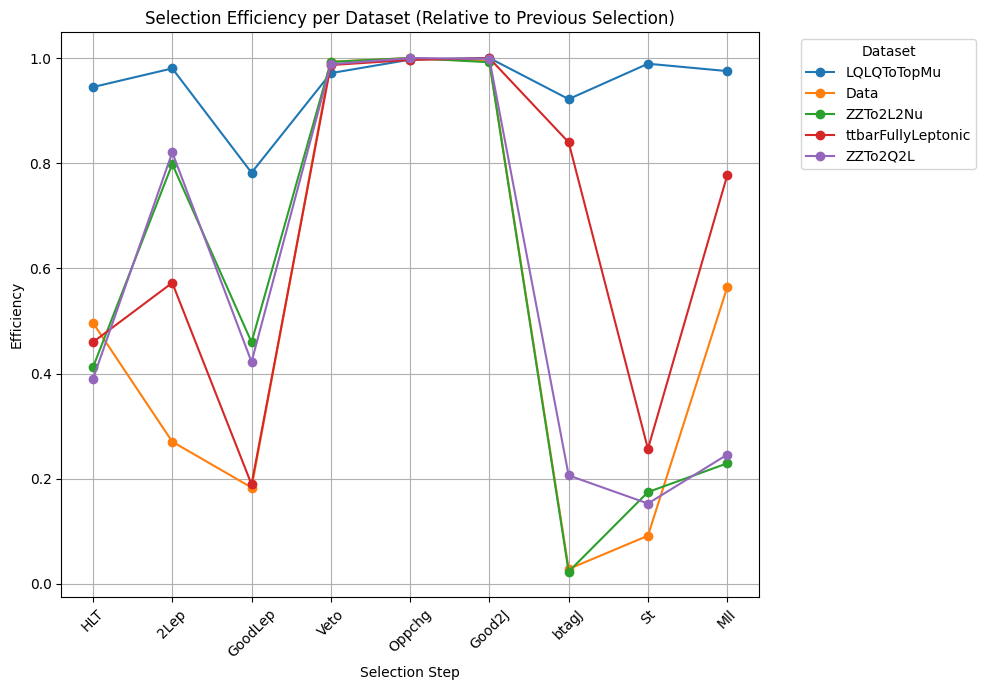

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous step
# Let's create a new DataFrame for efficiencies to keep 'df' unchanged
efficiencies = pd.DataFrame()
efficiencies['Dataset'] = df['Dataset']

# Calculate efficiency relative to the previous selection
for i in range(1, len(df.columns) - 1):  # Start from the second column and go to the second last column
    efficiencies[df.columns[i+1]] = df.iloc[:, i+1] / df.iloc[:, i]

# Plotting
plt.figure(figsize=(10, 7))
selection_points = efficiencies.columns[1:]  # Skipping 'Dataset' column

# Loop through each dataset and plot its efficiency
for i, row in efficiencies.iterrows():
    # Skip 'Dataset' in row indexing
    plt.plot(selection_points, row[1:], label=row['Dataset'], marker='o')

plt.title('Selection Efficiency per Dataset (Relative to Previous Selection)')
plt.xlabel('Selection Step')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the plot to a file
plt.savefig('plot/selection_efficiency_relative_per_dataset.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()



In [95]:
latex_code = dff.to_latex(index=False, 
                         longtable=False,
                         float_format="{:0.1f}".format)  # Formatting floating point numbers

# Assuming df has 3 columns. Adjust '|l|l|l|' as per your DataFrame's columns.
column_format = '|l|l|l|' 

latex_document = f"""
\\documentclass[10pt]{{article}}
\\usepackage[utf8]{{inputenc}}
\\usepackage{{geometry}}
\\geometry{{a4paper}}
\\usepackage{{pdflscape}}
\\usepackage{{booktabs}}

\\begin{{document}}
\\begin{{landscape}}
\\small
\\begin{{center}}
\\begin{{tabular}}{{{column_format}}}

{latex_code}
\\end{{tabular}}
\\end{{center}}
\\end{{landscape}}
\\end{{document}}
"""

# Save the corrected LaTeX code
with open("Latex/corrected_Cutflow_table_landscape_ISOall1.tex", "w") as file:
    file.write(latex_document)





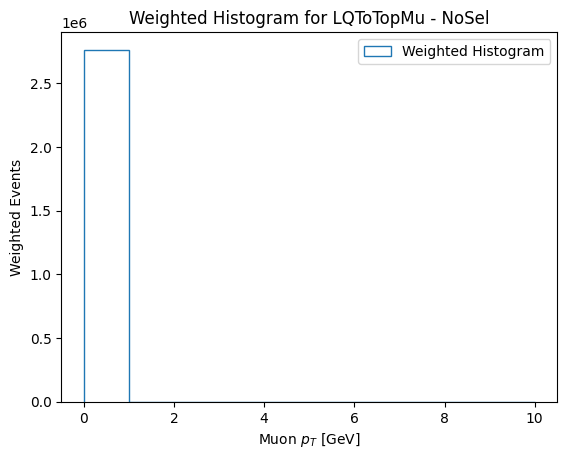

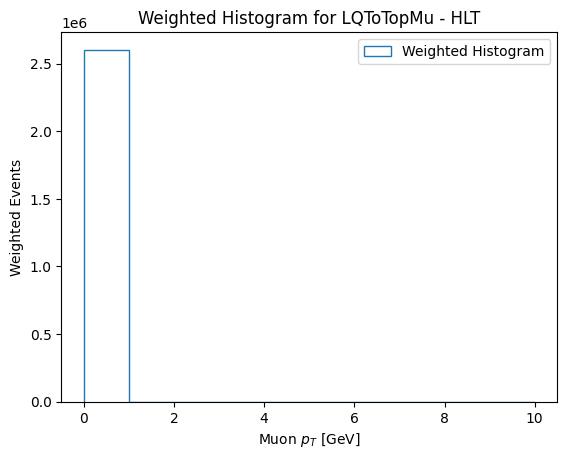

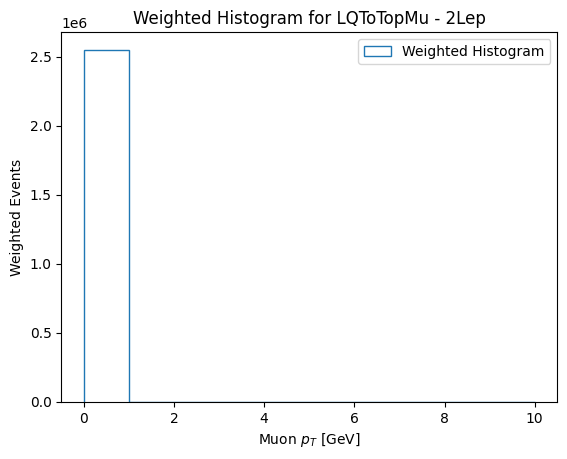

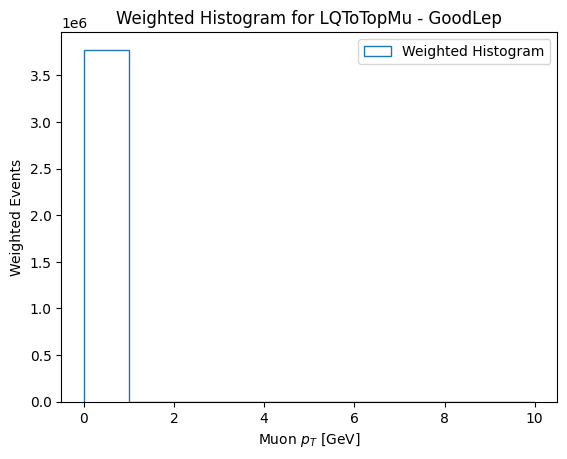

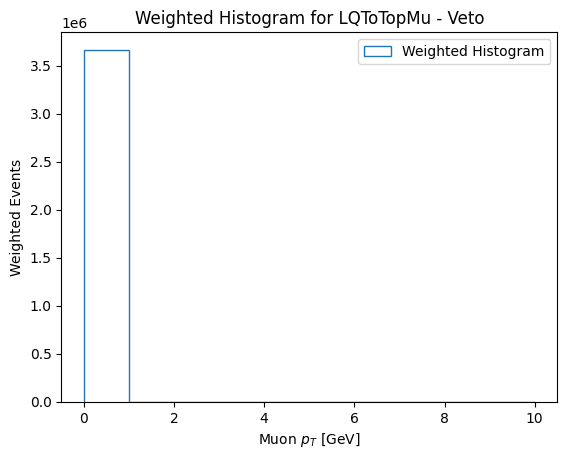

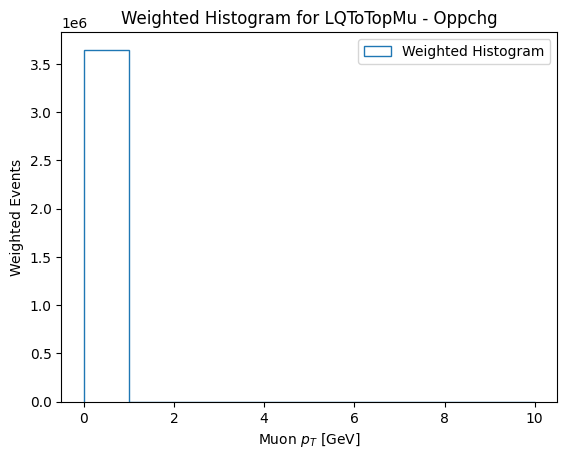

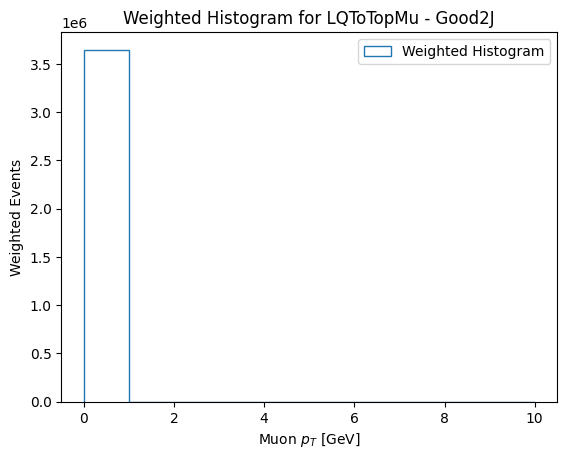

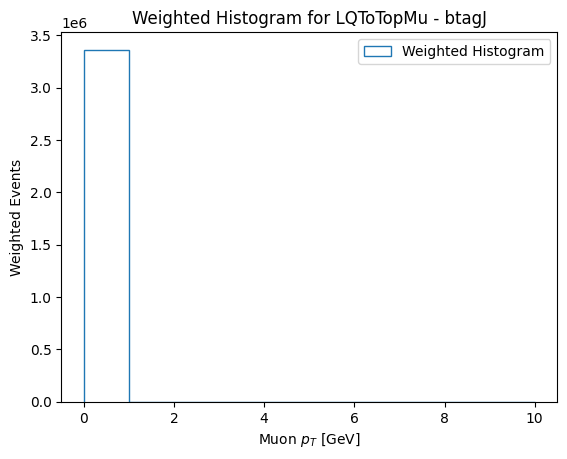

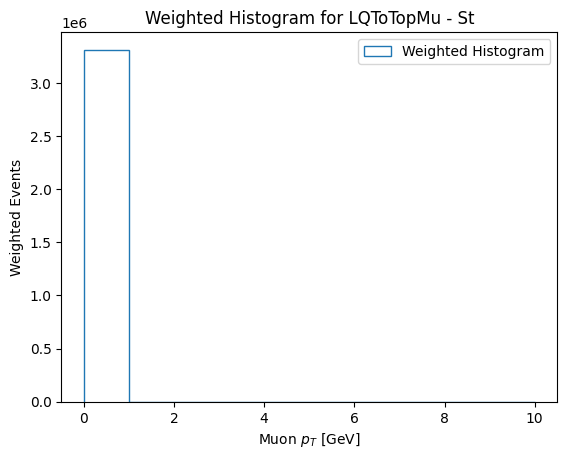

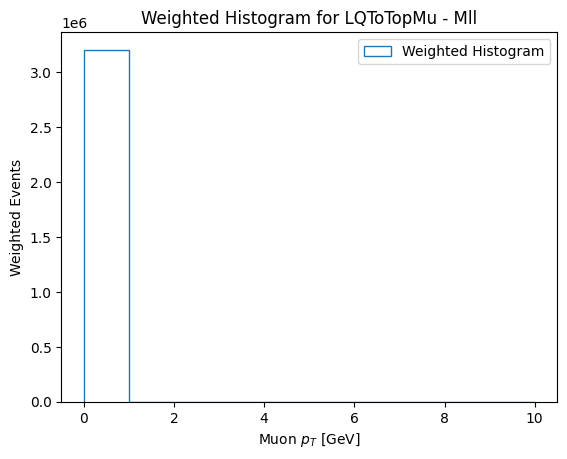

In [43]:
import numpy as np
import matplotlib.pyplot as plt 
# Iterate over each region
for region, region_data in output.items():
    # Iterate over each selection criteria in the region
    for selection_criteria, selection_data in region_data.items():
        # Check if selection_data is a dictionary
        if isinstance(selection_data, dict):
            # Get the histogram and weight for the selection criteria
            histogram = selection_data.get("nMuon")
            weights = selection_data.get("wtEvents")
            
            # Plot the histogram with weights if both histogram and weights exist
            if histogram is not None and weights is not None:
                # Extract values from the histogram
                histogram_values = histogram.values()
                
                # Repeat the total weight for each bin in the histogram
                weighted_counts = np.repeat(weights, len(histogram_values))
                
                # Plot the histogram
                plt.figure()
                plt.hist(histogram_values, bins=histogram.axes[0].edges, weights=weighted_counts, histtype='step', label='Weighted Histogram')
                plt.xlabel('Muon $p_T$ [GeV]')
                plt.ylabel('Weighted Events')
                plt.title(f'Weighted Histogram for {region} - {selection_criteria}')
                plt.legend()
                plt.show()




Note: you may need to restart the kernel to use updated packages.


In [10]:
import subprocess

# Compile the LaTeX document to PDF
subprocess.run(["pdflatex", "table.tex"], check=True)

# This will produce 'table.pdf' in the current directory


FileNotFoundError: [Errno 2] No such file or directory: 'pdflatex'

In [24]:
import pdflatex

with open('table.tex', 'rb') as f:
    pdfl = pdflatex.PDFLaTeX.from_binarystring(f.read(), 'table')
pdf, log, cp = pdfl.create_pdf()

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmplah1rdvf/file.pdf'

In [9]:
import pandas as pd

# Define your selection points (columns) based on your provided results
selection_points = [
    "NoSel", "HLT", "HLTLep", "HLTandGoodLep", "HLTandGoodLepVeto", 
    "HLTandGoodLepOppchg", "HLTGoodLandGood2J", "HLTGoodLandGood2btagJ", "HLTGoodLandGood2JSt", 
    "HLTGoodLandGood2JStMll"
]

# Prepare data for DataFrame
data_for_df = []

# Append results for each dataset to the data list
datasets = ['ttbar_SemiLeptonic', 'ttbar_FullyLeptonic']
for dataset in datasets:
    results = [dataset]  # Start with dataset name
    for point in selection_points:
        # Corrected to use 'selEvents' as per the structure you provided
        results.append(output[dataset][point]['selEvents'])  # Append the number of selected events for each point
    data_for_df.append(results)

# Convert the data list into a DataFrame
df = pd.DataFrame(data_for_df, columns=["Dataset"] + selection_points)

# Print the DataFrame
print(df.to_string(index=False))


            Dataset    NoSel      HLT   HLTLep  HLTandGoodLep  HLTandGoodLepVeto  HLTandGoodLepOppchg  HLTGoodLandGood2J  HLTGoodLandGood2btagJ  HLTGoodLandGood2JSt  HLTGoodLandGood2JStMll
 ttbar_SemiLeptonic 781158.0 272465.0 122603.0         7093.0             7011.0               4617.0             4616.0                 4299.0               4283.0                   812.0
ttbar_FullyLeptonic 254555.0 123387.0  70345.0        17573.0            17281.0              16515.0            16514.0                14167.0              13864.0                  7402.0


In [12]:
fname = "/persistent/data1/ph20059/RUN2_UL/Tree_crab/SEVENTEEN/MC/ttbar_FullyLeptonic/TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8/Tree_09_Feb24_MCUL2017_ttbar_FullyLeptonic/240209_134459/0000/tree_1.root"

events = NanoEventsFactory.from_root(
    fileset,
    schemaclass=NanoAODSchema.v6,
    metadata={"dataset": "dataset"},
).events()
p = NanoProcessor()
out = p.process(events)

TypeError: Invalid file type (<class 'dict'>)

In [ ]:
# Iterate over the keys of the output dictionary
for region, histograms in output.items():
    print("Region:", region)
    
    # Iterate over the keys and values in the histograms dictionary
    for histogram_name, histogram in histograms.items():
        print("\tHistogram:", histogram_name)
        
        # Check if the histogram object is present
        if isinstance(histogram, dict):
            print("\t\tType: Dictionary")
            print("\t\tKeys:", histogram.keys())
        else:
            print("\t\tType:", type(histogram))
